# Flight Status Prediction

While airlines try to ensure passengers arrive on time, a wide variety of things can and sometimes do make it difficult for flights to arrive on time or worse, be canceled.

In some cases, problems can be unpredictable, such as bad weather, air condition, delay due to traffic or mechanical problems of flight. There is no federal law requiring airlines to compensate passengers for delayed flights.

Thus, it is crucial to keep passengers informed about flight status. This dataset contains all flight information including cancellations and delays by airline for dates to January 2018. So, we use this historical data to train our prediction model in such a way that it effectively predicts us with the expected status of the flight which includes delay or cancelled.

# Air Flight Dataset

This dataset contains all flight information including cancellation and delays by airline.

For your convenience you can use the Combined_Flights_XXXX.csv or Combined_Flights_XXXX.parquet files to access the combined data for the entire year. These files also have filtered out columns that are mostly null in the original dataset.

The raw data including all columns by month can be found in the files named Flights_XXXX_X.csv

# About the Flight Status Prediction Data Set

The Combined_Flights_2022.csv data set provided by Rob from Kaggle contains different features.

Follow this link to know more about this dataset: https://www.kaggle.com/datasets/robikscube/flight-delay-dataset-20182022

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plott

## 1. Reading Data

In [2]:
proj = pd.read_csv('./CF20/Combined_Flights_2022.csv', sep=',')
target_feature = ['Cancelled'];
#excluded_features = ['Year','Quarter','Month'];
included_features = ["FlightDate","Airline","Flight_Number_Marketing_Airline","Origin","Dest","Cancelled","Diverted",
    "CRSDepTime","DepTime","DepDelayMinutes","OriginAirportID","OriginCityName","OriginStateName","DestAirportID","DestCityName","DestStateName",
    "TaxiOut","TaxiIn","CRSArrTime","ArrTime","ArrDelayMinutes"]
proj=proj.loc[:, proj.columns.isin(included_features)]
proj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4078318 entries, 0 to 4078317
Data columns (total 21 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   FlightDate                       object 
 1   Airline                          object 
 2   Origin                           object 
 3   Dest                             object 
 4   Cancelled                        bool   
 5   Diverted                         bool   
 6   CRSDepTime                       int64  
 7   DepTime                          float64
 8   DepDelayMinutes                  float64
 9   ArrTime                          float64
 10  ArrDelayMinutes                  float64
 11  Flight_Number_Marketing_Airline  int64  
 12  OriginAirportID                  int64  
 13  OriginCityName                   object 
 14  OriginStateName                  object 
 15  DestAirportID                    int64  
 16  DestCityName                     object 
 17  DestStat

In [3]:
proj.head()

,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,ArrTime,...,Flight_Number_Marketing_Airline,OriginAirportID,OriginCityName,OriginStateName,DestAirportID,DestCityName,DestStateName,TaxiOut,TaxiIn,CRSArrTime
0,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",GJT,DEN,False,False,1133,1123.0,0.0,1228.0,...,4301,11921,"Grand Junction, CO",Colorado,11292,"Denver, CO",Colorado,17.0,8.0,1245
1,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",HRL,IAH,False,False,732,728.0,0.0,848.0,...,4299,12206,"Harlingen/San Benito, TX",Texas,12266,"Houston, TX",Texas,16.0,9.0,849
2,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",DRO,DEN,False,False,1529,1514.0,0.0,1636.0,...,4298,11413,"Durango, CO",Colorado,11292,"Denver, CO",Colorado,21.0,14.0,1639
3,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",IAH,GPT,False,False,1435,1430.0,0.0,1547.0,...,4296,12266,"Houston, TX",Texas,11973,"Gulfport/Biloxi, MS",Mississippi,16.0,4.0,1605
4,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",DRO,DEN,False,False,1135,1135.0,0.0,1251.0,...,4295,11413,"Durango, CO",Colorado,11292,"Denver, CO",Colorado,19.0,8.0,1245


In [4]:
len(proj.index)

4078318

### Missing Values 

In [5]:
#Missing values
print(proj.isna().sum())

FlightDate                              0
Airline                                 0
Origin                                  0
Dest                                    0
Cancelled                               0
Diverted                                0
CRSDepTime                              0
DepTime                            120433
DepDelayMinutes                    120495
ArrTime                            124239
ArrDelayMinutes                    133402
Flight_Number_Marketing_Airline         0
OriginAirportID                         0
OriginCityName                          0
OriginStateName                         0
DestAirportID                           0
DestCityName                            0
DestStateName                           0
TaxiOut                            122666
TaxiIn                             124242
CRSArrTime                              0
dtype: int64


In [6]:
proj['DepTime'] = proj['DepTime'].fillna(proj['DepTime'].mean())
proj['DepDelayMinutes'] = proj['DepDelayMinutes'].fillna(proj['DepDelayMinutes'].mean())
proj['ArrTime'] = proj['ArrTime'].fillna(proj['ArrTime'].mean())
proj['ArrDelayMinutes'] = proj['ArrDelayMinutes'].fillna(proj['ArrDelayMinutes'].mean())
proj['TaxiOut'] = proj['TaxiOut'].fillna(proj['TaxiOut'].mean())
proj['TaxiIn'] = proj['TaxiIn'].fillna(proj['TaxiIn'].mean())

print(proj.isna().sum())


FlightDate                         0
Airline                            0
Origin                             0
Dest                               0
Cancelled                          0
Diverted                           0
CRSDepTime                         0
DepTime                            0
DepDelayMinutes                    0
ArrTime                            0
ArrDelayMinutes                    0
Flight_Number_Marketing_Airline    0
OriginAirportID                    0
OriginCityName                     0
OriginStateName                    0
DestAirportID                      0
DestCityName                       0
DestStateName                      0
TaxiOut                            0
TaxiIn                             0
CRSArrTime                         0
dtype: int64


In [7]:
proj['Cancelled'].value_counts()

False    3955126
True      123192
Name: Cancelled, dtype: int64

In [8]:
label='Cancelled'
g = proj.groupby(label, group_keys=False)
balanced_df = pd.DataFrame(g.apply(lambda x: x.sample(g.size().min()))).reset_index(drop=True)


In [9]:
balanced_df['Cancelled'].value_counts()

False    123192
True     123192
Name: Cancelled, dtype: int64

In [10]:

balanced_df= balanced_df.drop(balanced_df[balanced_df['Cancelled'] == True].sample(frac=.6).index)
balanced_df = balanced_df.reset_index()
#indexes = np.random.choice(balanced_df.index, 20000, replace=False)


In [11]:
balanced_df['Cancelled'].value_counts()

False    123192
True      49277
Name: Cancelled, dtype: int64

In [12]:
balanced_df=balanced_df.sample(n = 100000, replace = False)

In [13]:
balanced_df['Cancelled'].value_counts()

False    71589
True     28411
Name: Cancelled, dtype: int64

In [14]:
proj=balanced_df
proj.to_csv('stripped_data1.csv')

In [15]:
#  To convert object types we are using in built function df.convert_dtypes
Datatypes_df=proj.convert_dtypes(infer_objects=True)
dtypes=Datatypes_df.dtypes
print("\033[1m"+"Data types of each variable"+"\033[0m")
dtypes

Data types of each variable


index                                Int64
FlightDate                          string
Airline                             string
Origin                              string
Dest                                string
Cancelled                          boolean
Diverted                           boolean
CRSDepTime                           Int64
DepTime                            Float64
DepDelayMinutes                    Float64
ArrTime                            Float64
ArrDelayMinutes                    Float64
Flight_Number_Marketing_Airline      Int64
OriginAirportID                      Int64
OriginCityName                      string
OriginStateName                     string
DestAirportID                        Int64
DestCityName                        string
DestStateName                       string
TaxiOut                            Float64
TaxiIn                             Float64
CRSArrTime                           Int64
dtype: object

In [16]:
proj['OriginCityName'].value_counts()

New York, NY             5462
Chicago, IL              5243
Dallas/Fort Worth, TX    4098
Atlanta, GA              4053
Denver, CO               3786
                         ... 
Adak Island, AK             2
Elko, NV                    1
Pierre, SD                  1
Wilmington, DE              1
Branson, MO                 1
Name: OriginCityName, Length: 362, dtype: int64

In [17]:
proj['DestCityName'].value_counts()

New York, NY             5399
Chicago, IL              5381
Dallas/Fort Worth, TX    4160
Atlanta, GA              4121
Denver, CO               3752
                         ... 
Twin Falls, ID              2
Wilmington, DE              1
Branson, MO                 1
Saipan, TT                  1
Santa Maria, CA             1
Name: DestCityName, Length: 363, dtype: int64

In [18]:
proj['OriginCityName'] = proj['OriginCityName'].str.partition(',')[0]
proj['DestCityName'] = proj['DestCityName'].str.partition(',')[0]
proj.head()

,index,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,...,Flight_Number_Marketing_Airline,OriginAirportID,OriginCityName,OriginStateName,DestAirportID,DestCityName,DestStateName,TaxiOut,TaxiIn,CRSArrTime
114052,114052,2022-06-26,SkyWest Airlines Inc.,PUB,DEN,False,False,1826,1817.000000,0.000000,...,5057,14288,Pueblo,Colorado,11292,Denver,Colorado,14.00000,15.000000,1932
111911,111911,2022-03-03,Southwest Airlines Co.,OAK,BUR,False,False,1720,1720.000000,0.000000,...,953,13796,Oakland,California,10800,Burbank,California,10.00000,2.000000,1830
117738,117738,2022-06-03,Comair Inc.,HPN,CLT,False,False,630,625.000000,0.000000,...,5097,12197,White Plains,New York,11057,Charlotte,North Carolina,17.00000,4.000000,821
81857,81857,2022-07-01,Comair Inc.,PHL,JAX,False,False,1548,1548.000000,0.000000,...,5596,14100,Philadelphia,Pennsylvania,12451,Jacksonville,Florida,22.00000,28.000000,1807
148250,185865,2022-05-24,American Airlines Inc.,DFW,MCO,True,False,1855,1334.373931,16.014938,...,2186,11298,Dallas/Fort Worth,Texas,13204,Orlando,Florida,16.97375,7.894387,2232


### Splitting data into Continous and Categorical

In [19]:
#Splitting data into Continous and Categorical 
continous=proj.select_dtypes(include=[np.number])
categorical=proj.select_dtypes(exclude=[np.number])
continous

,index,CRSDepTime,DepTime,DepDelayMinutes,ArrTime,ArrDelayMinutes,Flight_Number_Marketing_Airline,OriginAirportID,DestAirportID,TaxiOut,TaxiIn,CRSArrTime
114052,114052,1826,1817.000000,0.000000,1917.000000,0.000000,5057,14288,11292,14.00000,15.000000,1932
111911,111911,1720,1720.000000,0.000000,1829.000000,0.000000,953,13796,10800,10.00000,2.000000,1830
117738,117738,630,625.000000,0.000000,814.000000,0.000000,5097,12197,11057,17.00000,4.000000,821
81857,81857,1548,1548.000000,0.000000,1834.000000,27.000000,5596,14100,12451,22.00000,28.000000,1807
148250,185865,1855,1334.373931,16.014938,1457.886018,15.783071,2186,11298,13204,16.97375,7.894387,2232
...,...,...,...,...,...,...,...,...,...,...,...,...
73110,73110,1900,1920.000000,20.000000,2036.000000,6.000000,3071,13796,14908,10.00000,3.000000,2030
43403,43403,715,711.000000,0.000000,844.000000,0.000000,2218,11042,10397,9.00000,6.000000,905
27780,27780,600,557.000000,0.000000,752.000000,0.000000,2356,14492,13303,13.00000,6.000000,814
76902,76902,1819,1813.000000,0.000000,1908.000000,0.000000,5397,11057,13795,19.00000,3.000000,1930


In [20]:
# we can extract unique values in a dataframe using .unique

continous
contArr =[]
domain={dom:proj[dom].unique() for dom in continous}
print("\033[1m"+"Domain for each Descriptive feauture:"+"\033[0m")
for x,y in domain.items():
    contArr.append(x)
    print(x+": ")
    print(y)

Domain for each Descriptive feauture:
index: 
[114052 111911 117738 ...  27780  76902   4010]
CRSDepTime: 
[1826 1720  630 ...  139   22   52]
DepTime: 
[1817. 1720.  625. ...  259.  122.  158.]
DepDelayMinutes: 
[0.0000000e+00 1.6014938e+01 4.3000000e+01 2.1000000e+01 1.6000000e+01
 2.0000000e+00 5.1000000e+01 8.4000000e+01 1.5000000e+01 9.0000000e+00
 3.0000000e+00 3.6000000e+01 3.2000000e+01 2.7000000e+01 6.0000000e+00
 1.5300000e+02 1.1000000e+01 5.2000000e+01 1.0000000e+00 2.3000000e+01
 5.0000000e+00 4.0000000e+01 1.7000000e+01 3.7000000e+01 9.8000000e+01
 1.9000000e+01 4.0000000e+00 1.3000000e+01 2.2000000e+01 2.6000000e+01
 3.0000000e+01 7.0000000e+00 1.8000000e+01 6.8000000e+01 1.0000000e+01
 4.7000000e+01 5.7000000e+01 1.7400000e+02 3.9000000e+01 8.0000000e+00
 1.7500000e+02 1.7800000e+02 1.3100000e+02 1.2500000e+02 4.2000000e+01
 7.2000000e+01 1.2000000e+01 1.0700000e+02 3.4000000e+01 2.0000000e+01
 1.6500000e+02 5.6000000e+01 3.8000000e+01 3.3000000e+01 7.6000000e+01
 2.400

In [21]:
print(contArr)

['index', 'CRSDepTime', 'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Flight_Number_Marketing_Airline', 'OriginAirportID', 'DestAirportID', 'TaxiOut', 'TaxiIn', 'CRSArrTime']


In [22]:
categorical
catArr = []
domain={dom:proj[dom].unique() for dom in categorical}
print("\033[1m"+"Domain for each Descriptive feauture:"+"\033[0m")
for x,y in domain.items():
    catArr.append(x)
    print(x+": ")
    print(y)

Domain for each Descriptive feauture:
FlightDate: 
['2022-06-26' '2022-03-03' '2022-06-03' '2022-07-01' '2022-05-24'
 '2022-04-09' '2022-03-29' '2022-03-23' '2022-06-22' '2022-05-23'
 '2022-04-30' '2022-04-17' '2022-03-09' '2022-07-24' '2022-01-25'
 '2022-04-13' '2022-05-17' '2022-06-19' '2022-04-18' '2022-05-10'
 '2022-01-28' '2022-01-06' '2022-07-05' '2022-02-17' '2022-06-18'
 '2022-05-08' '2022-03-27' '2022-02-06' '2022-02-03' '2022-01-23'
 '2022-01-05' '2022-01-30' '2022-06-02' '2022-05-22' '2022-03-07'
 '2022-06-17' '2022-02-19' '2022-05-11' '2022-07-03' '2022-01-09'
 '2022-02-10' '2022-01-12' '2022-05-13' '2022-06-28' '2022-04-03'
 '2022-06-16' '2022-03-12' '2022-06-20' '2022-05-02' '2022-01-27'
 '2022-05-28' '2022-02-08' '2022-01-03' '2022-04-02' '2022-04-21'
 '2022-01-16' '2022-03-06' '2022-05-18' '2022-05-05' '2022-07-13'
 '2022-07-28' '2022-03-24' '2022-05-16' '2022-03-18' '2022-05-06'
 '2022-03-31' '2022-01-01' '2022-04-01' '2022-01-11' '2022-01-02'
 '2022-02-04' '2022-07-21

In [23]:
print(catArr)

['FlightDate', 'Airline', 'Origin', 'Dest', 'Cancelled', 'Diverted', 'OriginCityName', 'OriginStateName', 'DestCityName', 'DestStateName']


### Data Quality Reports:

In [24]:
DQCont_list = []
contArr

for i in range(len(contArr)):
    feature_row_data = []
    FeatureName = contArr[i]
    feature_row_data.append(FeatureName)
    feature_row_data.append(proj[FeatureName].size)                                      # appending the size of column
    feature_row_data.append(((proj[FeatureName].isnull().sum()/proj[FeatureName].size)*100)) # appending the % of null values
    feature_row_data.append(proj[FeatureName].nunique())
    feature_row_data.append(proj[FeatureName].min())
    feature_row_data.append(proj[FeatureName].max())
    feature_row_data.append(proj[FeatureName].mean())
    feature_row_data.append(proj[FeatureName].median())
    feature_row_data.append(proj[FeatureName].std())
    Q1 = proj[FeatureName].quantile(0.25)
    feature_row_data.append(Q1)
    Q3 = proj[FeatureName].quantile(0.75)
    feature_row_data.append(Q3)
    IQR = Q3-Q1
    feature_row_data.append(IQR)
    UB = Q3+(1.5*IQR);
    LB = Q1-(1.5*IQR);
    feature_row_data.append(LB)
    feature_row_data.append(UB)   
    DQCont_list.append(feature_row_data)
continous_df = pd.DataFrame(DQCont_list, columns = ['Feature','Count', '% of Missing', 'Card.','Min.','Max.','Mean','Median','Std Dev','Q1', 'Q3','IQR','LB','UB'])
continous_df.to_csv('continous.csv')
heading="DATA QUALITY REPORT FOR CONTINOUS VARIABLES:"
print('\033[1m'+heading)
display(continous_df)
        

DATA QUALITY REPORT FOR CONTINOUS VARIABLES:


,Feature,Count,% of Missing,Card.,Min.,Max.,Mean,Median,Std Dev,Q1,Q3,IQR,LB,UB
0,index,100000,0.0,100000,0.0,246383.0,96609.561230,85920.500000,65944.798974,43129.75,138009.000000,94879.250000,-99189.125000,280327.875000
1,CRSDepTime,100000,0.0,1223,1.0,2359.0,1338.655320,1330.000000,495.447358,911.00,1745.000000,834.000000,-340.000000,2996.000000
2,DepTime,100000,0.0,1309,1.0,2400.0,1333.766772,1334.373931,429.553321,1051.00,1604.000000,553.000000,221.500000,2433.500000
3,DepDelayMinutes,100000,0.0,534,0.0,1912.0,16.350299,5.000000,45.436503,0.00,16.014938,16.014938,-24.022407,40.037345
4,ArrTime,100000,0.0,1404,1.0,2400.0,1456.661799,1457.886018,458.982188,1223.00,1729.000000,506.000000,464.000000,2488.000000
5,ArrDelayMinutes,100000,0.0,514,0.0,1912.0,15.841577,6.000000,44.243183,0.00,15.783071,15.783071,-23.674607,39.457679
6,Flight_Number_Marketing_Airline,100000,0.0,6403,1.0,9664.0,2616.610950,2274.000000,1768.538401,1130.00,4008.000000,2878.000000,-3187.000000,8325.000000
7,OriginAirportID,100000,0.0,368,10135.0,16869.0,12623.398830,12478.000000,1510.857146,11292.00,13930.000000,2638.000000,7335.000000,17887.000000
8,DestAirportID,100000,0.0,369,10135.0,16869.0,12622.763320,12478.000000,1507.937382,11292.00,13930.000000,2638.000000,7335.000000,17887.000000
9,TaxiOut,100000,0.0,138,1.0,176.0,17.027525,16.973750,8.188569,13.00,17.000000,4.000000,7.000000,23.000000


In [25]:
continous.describe()

,index,CRSDepTime,DepTime,DepDelayMinutes,ArrTime,ArrDelayMinutes,Flight_Number_Marketing_Airline,OriginAirportID,DestAirportID,TaxiOut,TaxiIn,CRSArrTime
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,96609.561230,1338.655320,1333.766772,16.350299,1456.661799,15.841577,2616.610950,12623.398830,12622.763320,17.027525,7.890959,1496.617390
std,65944.798974,495.447358,429.553321,45.436503,458.982188,44.243183,1768.538401,1510.857146,1507.937382,8.188569,5.631576,523.966664
min,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,10135.000000,10135.000000,1.000000,1.000000,1.000000
25%,43129.750000,911.000000,1051.000000,0.000000,1223.000000,0.000000,1130.000000,11292.000000,11292.000000,13.000000,5.000000,1103.000000
50%,85920.500000,1330.000000,1334.373931,5.000000,1457.886018,6.000000,2274.000000,12478.000000,12478.000000,16.973750,7.894387,1524.000000
75%,138009.000000,1745.000000,1604.000000,16.014938,1729.000000,15.783071,4008.000000,13930.000000,13930.000000,17.000000,8.000000,1932.000000
max,246383.000000,2359.000000,2400.000000,1912.000000,2400.000000,1912.000000,9664.000000,16869.000000,16869.000000,176.000000,202.000000,2359.000000


C:\Users\yaswa\AppData\Local\Temp\ipykernel_20176\966589449.py:7: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  ContHistogram.hist(bins=30, alpha=1, ax=ax)


array([[<AxesSubplot:title={'center':'index'}>,
        <AxesSubplot:title={'center':'CRSDepTime'}>,
        <AxesSubplot:title={'center':'DepTime'}>],
       [<AxesSubplot:title={'center':'DepDelayMinutes'}>,
        <AxesSubplot:title={'center':'ArrTime'}>,
        <AxesSubplot:title={'center':'ArrDelayMinutes'}>],
       [<AxesSubplot:title={'center':'Flight_Number_Marketing_Airline'}>,
        <AxesSubplot:title={'center':'OriginAirportID'}>,
        <AxesSubplot:title={'center':'DestAirportID'}>],
       [<AxesSubplot:title={'center':'TaxiOut'}>,
        <AxesSubplot:title={'center':'TaxiIn'}>,
        <AxesSubplot:title={'center':'CRSArrTime'}>]], dtype=object)

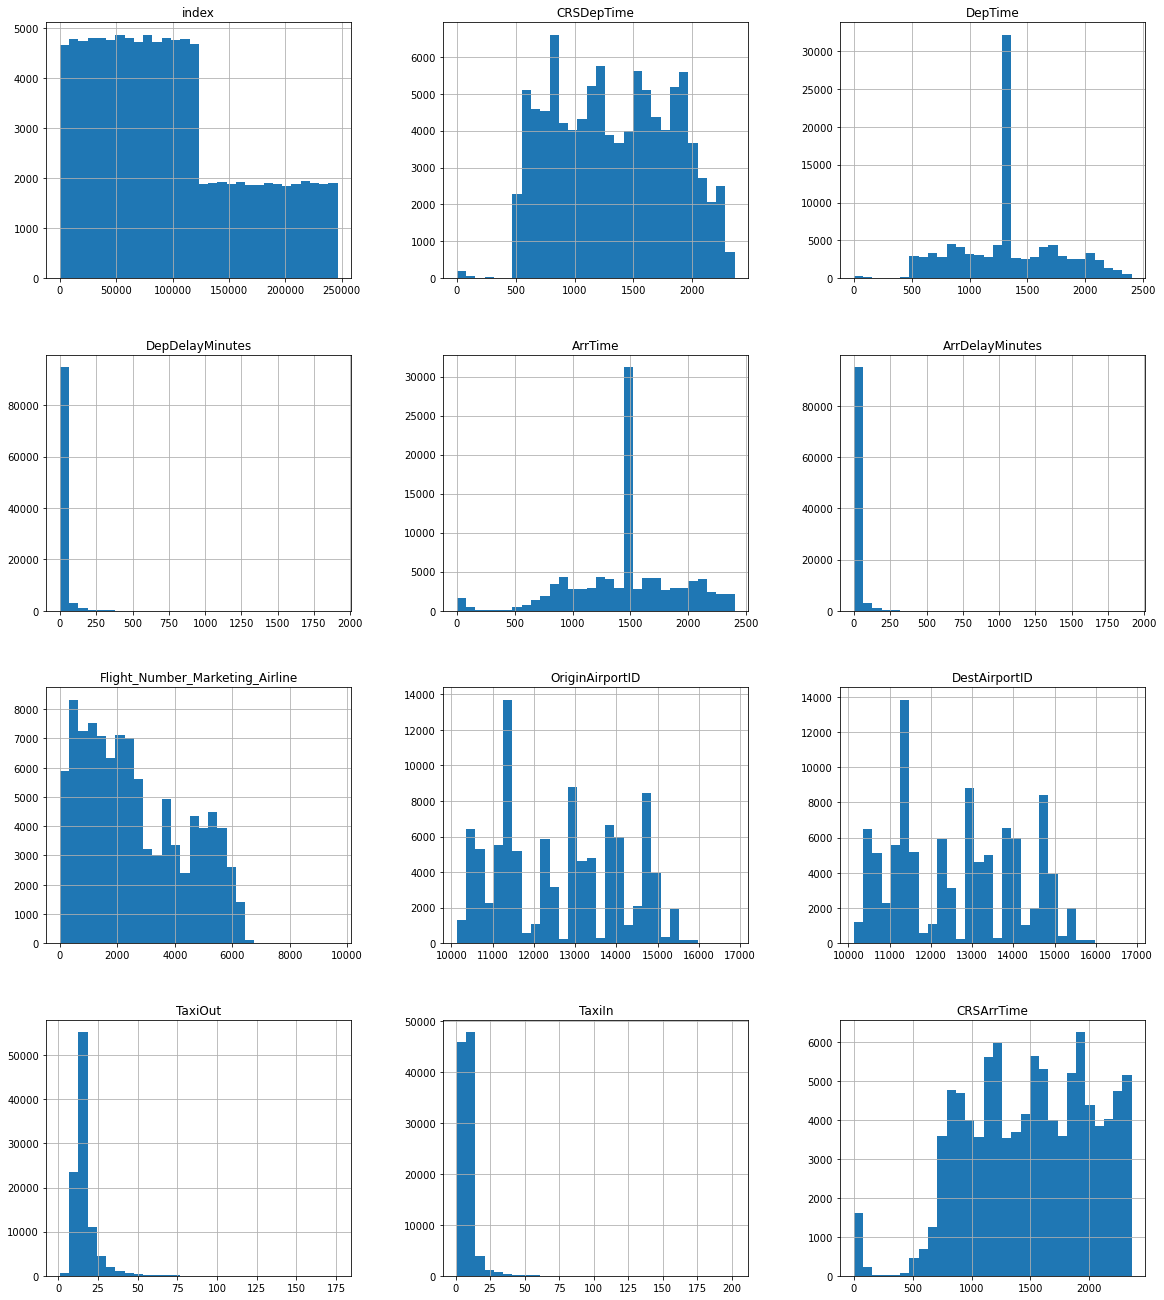

In [26]:
# Histograms for continous features.

fig, ax = plott.subplots(figsize=(16,18)) 
fig.tight_layout()                                             # setting or providing padding in between the subplots
ContHistogram = proj[continous_df['Feature']]                      # subsetting the main data frame for subplots

ContHistogram.hist(bins=30, alpha=1, ax=ax)   

In [27]:
categorical.describe()

,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,OriginCityName,OriginStateName,DestCityName,DestStateName
count,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000
unique,212,21,368,369,2,2,353,53,354,53
top,2022-02-03,Southwest Airlines Co.,ORD,ORD,False,False,New York,Texas,New York,Texas
freq,1406,16880,4308,4367,71589,99815,5462,10376,5399,10519


In [28]:
DQCat_list = []
catArr

for i in range(len(catArr)):
    feature_row_data = []
    FeatureName = catArr[i]
    feature_row_data.append(FeatureName)
    feature_row_data.append(proj[FeatureName].size)                                      # appending the size of column
    feature_row_data.append(((proj[FeatureName].isnull().sum()/proj[FeatureName].size)*100)) # appending the % of null values
    feature_row_data.append(proj[FeatureName].nunique()) 
    freqency = []                                                                  # empty list to find the frequencies
    freqency = categorical[FeatureName].value_counts()# appending the total no.of unique values
    feature_row_data.append(freqency.index[0])                                             # appending the first most frequent element
    feature_row_data.append(freqency[freqency.index[0]])                                       # appending the frequency of first most frequent element
    feature_row_data.append(round((freqency[freqency.index[0]]/proj[FeatureName].size)*100, 4))
    # appending the frequency % of first most frequent element
    feature_row_data.append(freqency.index[1]) 
    feature_row_data.append(freqency[freqency.index[1]])                                       # appending the frequency of second most frequent element
    feature_row_data.append(round((freqency[freqency.index[1]]/proj[FeatureName].size)*100, 4))           # appending the frequency of % second most frequent element
    DQCat_list.append(feature_row_data)
categorical_df = pd.DataFrame(DQCat_list, columns = ['Feature','Count', '% of Missing', 'Card.', 'Mode', 'Mode Freq.', 'Mode %', '2nd Mode', '2nd Mode Freq.', '2nd Mode %'])
categorical_df.to_csv('categorical.csv')
heading="DATA QUALITY REPORT FOR CATEGORICAL VARIABLES:"
print('\033[1m'+heading)
display(categorical_df)

DATA QUALITY REPORT FOR CATEGORICAL VARIABLES:


,Feature,Count,% of Missing,Card.,Mode,Mode Freq.,Mode %,2nd Mode,2nd Mode Freq.,2nd Mode %
0,FlightDate,100000,0.0,212,2022-02-03,1406,1.406,2022-02-04,1155,1.155
1,Airline,100000,0.0,21,Southwest Airlines Co.,16880,16.880,American Airlines Inc.,12948,12.948
2,Origin,100000,0.0,368,ORD,4308,4.308,DFW,4098,4.098
3,Dest,100000,0.0,369,ORD,4367,4.367,DFW,4160,4.160
4,Cancelled,100000,0.0,2,False,71589,71.589,True,28411,28.411
5,Diverted,100000,0.0,2,False,99815,99.815,True,185,0.185
6,OriginCityName,100000,0.0,353,New York,5462,5.462,Chicago,5243,5.243
7,OriginStateName,100000,0.0,53,Texas,10376,10.376,California,9199,9.199
8,DestCityName,100000,0.0,354,New York,5399,5.399,Chicago,5381,5.381
9,DestStateName,100000,0.0,53,Texas,10519,10.519,Florida,9112,9.112


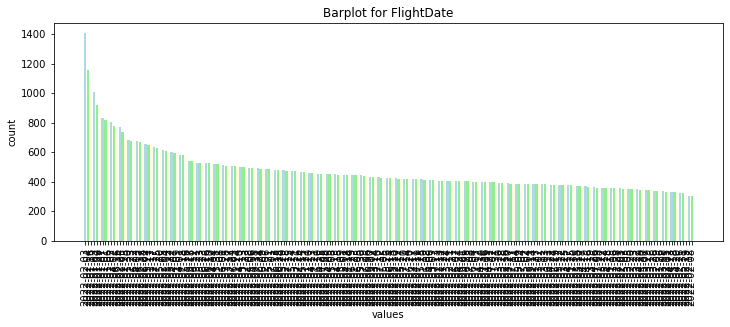

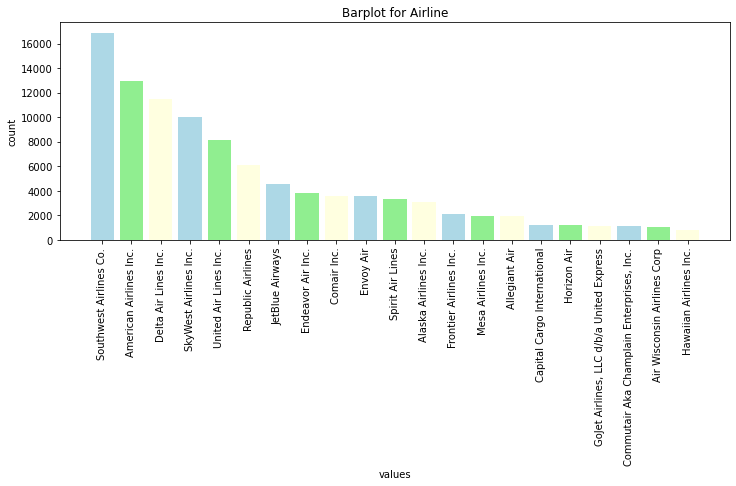

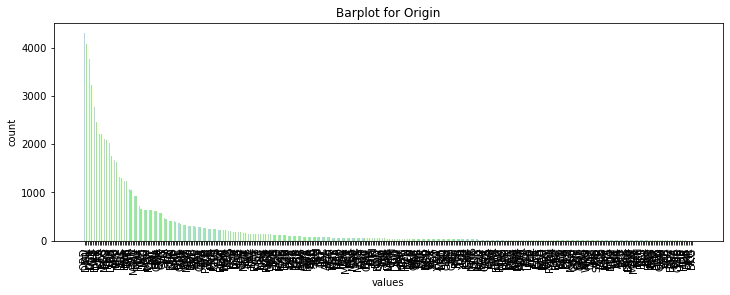

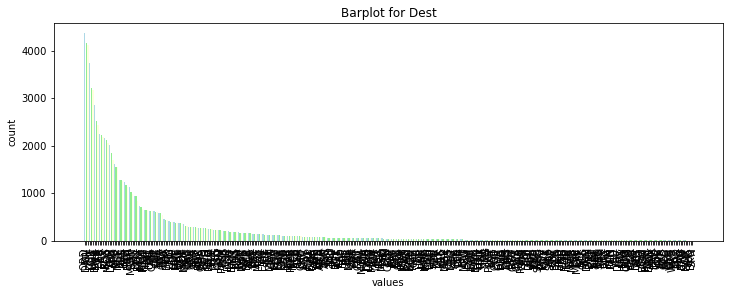

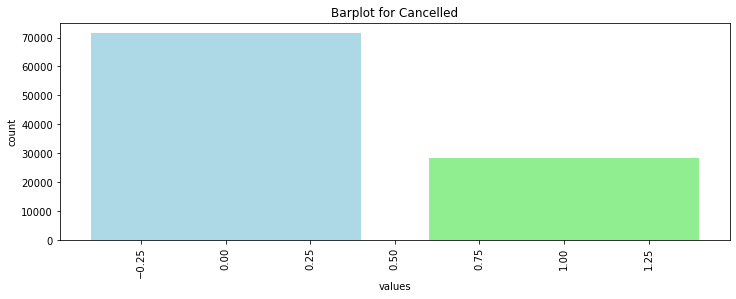

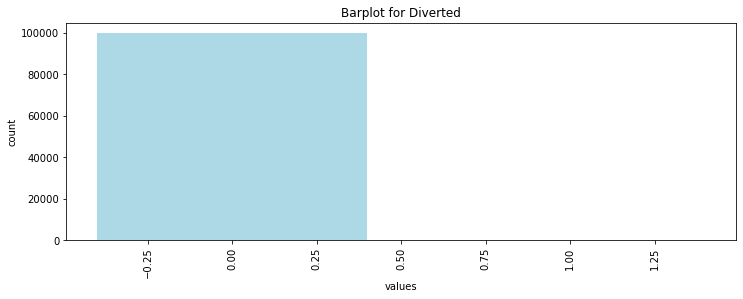

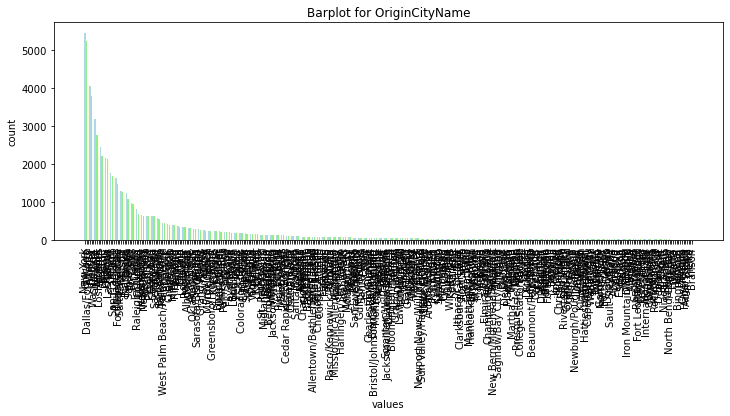

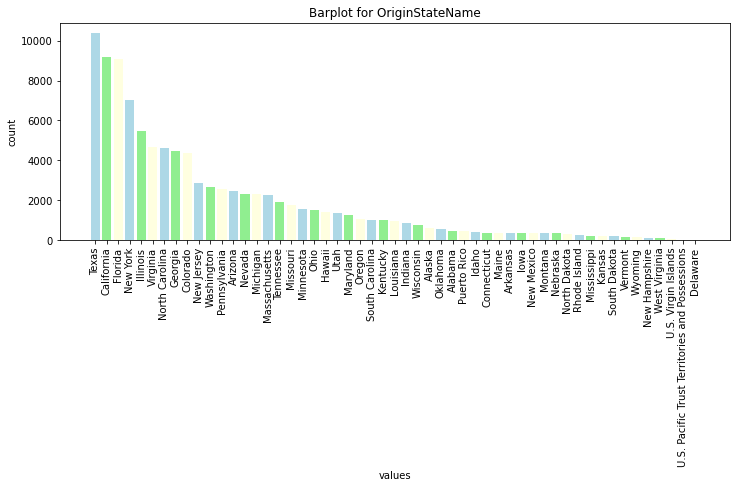

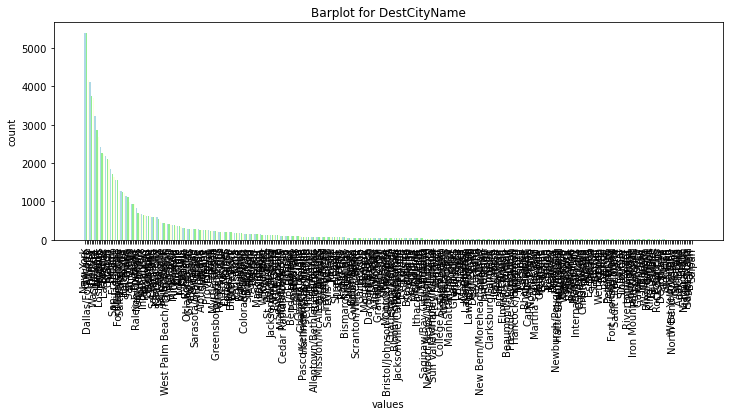

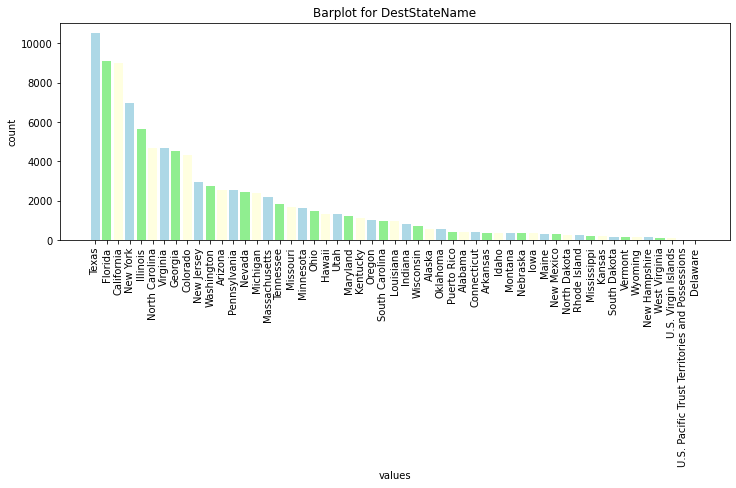

In [29]:
# bar plot for categorical features
CatBar = proj[categorical_df['Feature']]                               # getting all the categorical data

for (name, series) in CatBar.iteritems():                            # looping for each feature
    fig, ax = plott.subplots(figsize=(12,4)) 
    val_counts = series.value_counts()                                   # finding the frequencies of all the values
    ax.set_title('Barplot for '+name)                                    # displaying the title
    ax.set_ylabel('count')                                               # displaying the label on y-axis
    ax.set_xlabel('values')                                              # displaying the label on x-axis
    ax.bar(val_counts.index.to_list(),val_counts.to_list(),color=[ 'lightblue', 'lightgreen', 'lightyellow'])
    plott.xticks(rotation = 90)                                            # setting the labels in order to be vertical on x-axis
    plott.show()

### Outliers

In [32]:
DQCont_list = []
contArr

for i in range(len(contArr)):
    cont_feature_row_data = []
    FeatureName = contArr[i]
    cont_feature_row_data.append(FeatureName)
    cont_feature_row_data.append(proj[FeatureName].mean())
    cont_feature_row_data.append(proj[FeatureName].median())
    cont_feature_row_data.append(proj[FeatureName].std())
    Q1 = proj[FeatureName].quantile(0.25)
    cont_feature_row_data.append(Q1)
    Q3 = proj[FeatureName].quantile(0.75)
    cont_feature_row_data.append(Q3)
    IQR = Q3-Q1
    cont_feature_row_data.append(IQR)
    UB = Q3+(1.5*IQR);
    LB = Q1-(1.5*IQR);
    cont_feature_row_data.append(LB)
    cont_feature_row_data.append(UB)
    Outlier_Count = 0
    Outlier_Count = ((proj[FeatureName] > UB).sum())
    Outlier_Count = Outlier_Count+((proj[FeatureName] < LB).sum())
    cont_feature_row_data.append(Outlier_Count)
    DQCont_list.append(cont_feature_row_data)
continous_outliers_df = pd.DataFrame(DQCont_list, columns = ['Feature','Mean','Median','Std Dev','Q1', 'Q3','IQR','LB','UB','Outlier Count'])
continous_outliers_df.to_csv('continous_outliers.csv')
heading="OUTLIERS FOR CONTINOUS VARIABLES:"
print('\033[1m'+heading)
display(continous_outliers_df)
        

OUTLIERS FOR CONTINOUS VARIABLES:


,Feature,Mean,Median,Std Dev,Q1,Q3,IQR,LB,UB,Outlier Count
0,index,96609.561230,85920.500000,65944.798974,43129.75,138009.000000,94879.250000,-99189.125000,280327.875000,0
1,CRSDepTime,1338.655320,1330.000000,495.447358,911.00,1745.000000,834.000000,-340.000000,2996.000000,0
2,DepTime,1333.766772,1334.373931,429.553321,1051.00,1604.000000,553.000000,221.500000,2433.500000,483
3,DepDelayMinutes,16.350299,5.000000,45.436503,0.00,16.014938,16.014938,-24.022407,40.037345,8050
4,ArrTime,1456.661799,1457.886018,458.982188,1223.00,1729.000000,506.000000,464.000000,2488.000000,2523
5,ArrDelayMinutes,15.841577,6.000000,44.243183,0.00,15.783071,15.783071,-23.674607,39.457679,7871
6,Flight_Number_Marketing_Airline,2616.610950,2274.000000,1768.538401,1130.00,4008.000000,2878.000000,-3187.000000,8325.000000,5
7,OriginAirportID,12623.398830,12478.000000,1510.857146,11292.00,13930.000000,2638.000000,7335.000000,17887.000000,0
8,DestAirportID,12622.763320,12478.000000,1507.937382,11292.00,13930.000000,2638.000000,7335.000000,17887.000000,0
9,TaxiOut,17.027525,16.973750,8.188569,13.00,17.000000,4.000000,7.000000,23.000000,11284


### Clamping 

In [33]:
'''for i in continous_outliers_df.index:
    continous[contArr[i]].clip(continous_outliers_df['LB'][i],continous_outliers_df['UB'][i],inplace=True)
continous '''

for i in continous_outliers_df.index:
    continous[contArr[i]].clip(continous_outliers_df['LB'][i],continous_outliers_df['UB'][i],inplace=True)
continous

,index,CRSDepTime,DepTime,DepDelayMinutes,ArrTime,ArrDelayMinutes,Flight_Number_Marketing_Airline,OriginAirportID,DestAirportID,TaxiOut,TaxiIn,CRSArrTime
114052,114052,1826,1817.000000,0.000000,1917.000000,0.000000,5057.0,14288,11292,14.00000,12.500000,1932
111911,111911,1720,1720.000000,0.000000,1829.000000,0.000000,953.0,13796,10800,10.00000,2.000000,1830
117738,117738,630,625.000000,0.000000,814.000000,0.000000,5097.0,12197,11057,17.00000,4.000000,821
81857,81857,1548,1548.000000,0.000000,1834.000000,27.000000,5596.0,14100,12451,22.00000,12.500000,1807
148250,185865,1855,1334.373931,16.014938,1457.886018,15.783071,2186.0,11298,13204,16.97375,7.894387,2232
...,...,...,...,...,...,...,...,...,...,...,...,...
73110,73110,1900,1920.000000,20.000000,2036.000000,6.000000,3071.0,13796,14908,10.00000,3.000000,2030
43403,43403,715,711.000000,0.000000,844.000000,0.000000,2218.0,11042,10397,9.00000,6.000000,905
27780,27780,600,557.000000,0.000000,752.000000,0.000000,2356.0,14492,13303,13.00000,6.000000,814
76902,76902,1819,1813.000000,0.000000,1908.000000,0.000000,5397.0,11057,13795,19.00000,3.000000,1930


### Range Normalization

In [34]:
from sklearn.preprocessing import MinMaxScaler
rangeNorm = MinMaxScaler(feature_range=(0,1))# optional to mention feature_range =(0,1) as it takes the same value by default
scaled_df = rangeNorm.fit_transform(continous)
norm_df =pd.DataFrame(scaled_df, columns=contArr)
display(norm_df)

,index,CRSDepTime,DepTime,DepDelayMinutes,ArrTime,ArrDelayMinutes,Flight_Number_Marketing_Airline,OriginAirportID,DestAirportID,TaxiOut,TaxiIn,CRSArrTime
0,0.462905,0.773961,0.732385,0.000000,0.750517,0.000000,0.607400,0.616721,0.171815,0.437500,1.000000,0.818914
1,0.454216,0.729008,0.687859,0.000000,0.705062,0.000000,0.114368,0.543659,0.098753,0.187500,0.086957,0.775657
2,0.477866,0.266751,0.185219,0.000000,0.180785,0.000000,0.612206,0.306207,0.136917,0.625000,0.260870,0.347752
3,0.332235,0.656064,0.608905,0.000000,0.707645,0.684277,0.672153,0.588803,0.343926,0.937500,1.000000,0.765903
4,0.754374,0.786260,0.510844,0.400000,0.513371,0.400000,0.262494,0.172706,0.455747,0.623359,0.599512,0.946141
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.296733,0.805344,0.779665,0.499534,0.811983,0.152062,0.368813,0.543659,0.708791,0.187500,0.173913,0.860475
99996,0.176161,0.302799,0.224696,0.000000,0.196281,0.000000,0.266338,0.134690,0.038907,0.125000,0.434783,0.383376
99997,0.112751,0.254029,0.154005,0.000000,0.148760,0.000000,0.282917,0.647015,0.470448,0.375000,0.434783,0.344784
99998,0.312124,0.770992,0.730549,0.000000,0.745868,0.000000,0.648246,0.136917,0.543511,0.750000,0.173913,0.818066


In [35]:
### Data quality report for transformed data.
norm_df.describe()

,index,CRSDepTime,DepTime,DepDelayMinutes,ArrTime,ArrDelayMinutes,Flight_Number_Marketing_Airline,OriginAirportID,DestAirportID,TaxiOut,TaxiIn,CRSArrTime
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.392111,0.567284,0.510938,0.260336,0.517647,0.259345,0.314220,0.369528,0.369433,0.553040,0.535933,0.634274
std,0.267652,0.210113,0.196130,0.308301,0.223864,0.305792,0.212446,0.224363,0.223929,0.261755,0.237449,0.222208
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.175052,0.385920,0.380767,0.000000,0.392045,0.000000,0.135632,0.171815,0.171815,0.375000,0.347826,0.467345
50%,0.348727,0.563613,0.510844,0.124883,0.513371,0.152062,0.273066,0.347936,0.347936,0.623359,0.599512,0.645886
75%,0.560140,0.739610,0.634611,0.400000,0.653409,0.400000,0.481379,0.563558,0.563558,0.625000,0.608696,0.818914
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [36]:
categorical =categorical.reset_index()
norm_df =norm_df.reset_index()
mergeCatAndCont = [categorical,norm_df]
cat_final_df = pd.concat(mergeCatAndCont,axis=1)
cat_final_df.to_csv("cleaned_project_data1.csv")
cat_final_df

,index,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,OriginCityName,OriginStateName,DestCityName,...,DepTime,DepDelayMinutes,ArrTime,ArrDelayMinutes,Flight_Number_Marketing_Airline,OriginAirportID,DestAirportID,TaxiOut,TaxiIn,CRSArrTime
0,114052,2022-06-26,SkyWest Airlines Inc.,PUB,DEN,False,False,Pueblo,Colorado,Denver,...,0.732385,0.000000,0.750517,0.000000,0.607400,0.616721,0.171815,0.437500,1.000000,0.818914
1,111911,2022-03-03,Southwest Airlines Co.,OAK,BUR,False,False,Oakland,California,Burbank,...,0.687859,0.000000,0.705062,0.000000,0.114368,0.543659,0.098753,0.187500,0.086957,0.775657
2,117738,2022-06-03,Comair Inc.,HPN,CLT,False,False,White Plains,New York,Charlotte,...,0.185219,0.000000,0.180785,0.000000,0.612206,0.306207,0.136917,0.625000,0.260870,0.347752
3,81857,2022-07-01,Comair Inc.,PHL,JAX,False,False,Philadelphia,Pennsylvania,Jacksonville,...,0.608905,0.000000,0.707645,0.684277,0.672153,0.588803,0.343926,0.937500,1.000000,0.765903
4,148250,2022-05-24,American Airlines Inc.,DFW,MCO,True,False,Dallas/Fort Worth,Texas,Orlando,...,0.510844,0.400000,0.513371,0.400000,0.262494,0.172706,0.455747,0.623359,0.599512,0.946141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,73110,2022-01-01,Southwest Airlines Co.,OAK,SNA,False,False,Oakland,California,Santa Ana,...,0.779665,0.499534,0.811983,0.152062,0.368813,0.543659,0.708791,0.187500,0.173913,0.860475
99996,43403,2022-05-30,Delta Air Lines Inc.,CLE,ATL,False,False,Cleveland,Ohio,Atlanta,...,0.224696,0.000000,0.196281,0.000000,0.266338,0.134690,0.038907,0.125000,0.434783,0.383376
99997,27780,2022-06-01,American Airlines Inc.,RDU,MIA,False,False,Raleigh/Durham,North Carolina,Miami,...,0.154005,0.000000,0.148760,0.000000,0.282917,0.647015,0.470448,0.375000,0.434783,0.344784
99998,76902,2022-03-19,Comair Inc.,CLT,OAJ,False,False,Charlotte,North Carolina,Jacksonville/Camp Lejeune,...,0.730549,0.000000,0.745868,0.000000,0.648246,0.136917,0.543511,0.750000,0.173913,0.818066
